In [19]:
import matplotlib.pyplot as plt

import numpy as np
import os

from monai.data import (
    Dataset,
)

from monai.transforms import (
    Compose,
    LoadImaged,
)

from met_brewer import met_brew
from tqdm import tqdm
import glob
import pickle

%matplotlib inline

In [3]:
transforms = Compose(
            [
                LoadImaged(keys=["image", "label"], image_only=False),
                ]
)

In [33]:
data_dir = "/data/Dataset060_Merged_Def/"
train_images = sorted(glob.glob(os.path.join(data_dir, "imagesTr", "img*.nii.gz")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "labelsTr", "img*.nii.gz")))

data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]

btcv = Dataset(
    data=data_dicts,
    transform=transforms,
)

In [11]:
len(btcv)

30

In [37]:
data_dir = "/data/Dataset060_Merged_Def/"
train_images = sorted(glob.glob(os.path.join(data_dir, "imagesTr", "amos*.nii.gz")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "labelsTr", "amos*.nii.gz")))

data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]

amos = Dataset(
    data=data_dicts,
    transform=transforms,
)

In [38]:
len(amos)

272

In [39]:
data_dir = "/data/Dataset060_Merged_Def/"
train_images = sorted(glob.glob(os.path.join(data_dir, "imagesTr", "s*.nii.gz")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "labelsTr", "s*.nii.gz")))

data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]

totalseg = Dataset(
    data=data_dicts,
    transform=transforms,
)

In [40]:
len(totalseg)

378

## Data Extraction

In [41]:
btcv_image_sizes = []
btcv_image_dims = []
amos_image_sizes = []
amos_image_dims = []
totalseg_image_sizes = []
totalseg_image_dims = []

for image in tqdm(btcv):
    img = image['image']
    img_meta = image['image_meta_dict']
    
    btcv_image_sizes.append(list(img.shape))
    btcv_image_dims.append(list(img_meta['pixdim'][1:4]))

for image in tqdm(amos):
    img = image['image']
    img_meta = image['image_meta_dict']
    
    amos_image_sizes.append(list(img.shape))
    amos_image_dims.append(list(img_meta['pixdim'][1:4]))

for image in tqdm(totalseg):
    img = image['image']
    img_meta = image['image_meta_dict']
    
    totalseg_image_sizes.append(list(img.shape))
    totalseg_image_dims.append(list(img_meta['pixdim'][1:4]))

100%|██████████| 378/378 [06:20<00:00,  1.01s/it]


In [42]:
np.save('/data_analysis/three_datasets/data_saves/btcv_image_sizes.npy', btcv_image_sizes)
np.save('/data_analysis/three_datasets/data_saves/btcv_image_dims.npy', btcv_image_dims)
np.save('/data_analysis/three_datasets/data_saves/amos_image_sizes.npy', amos_image_sizes)
np.save('/data_analysis/three_datasets/data_saves/amos_image_dims.npy', amos_image_dims)
np.save('/data_analysis/three_datasets/data_saves/totalseg_image_sizes.npy', totalseg_image_sizes)
np.save('/data_analysis/three_datasets/data_saves/totalseg_image_dims.npy', totalseg_image_dims)

## Dataset Distribution

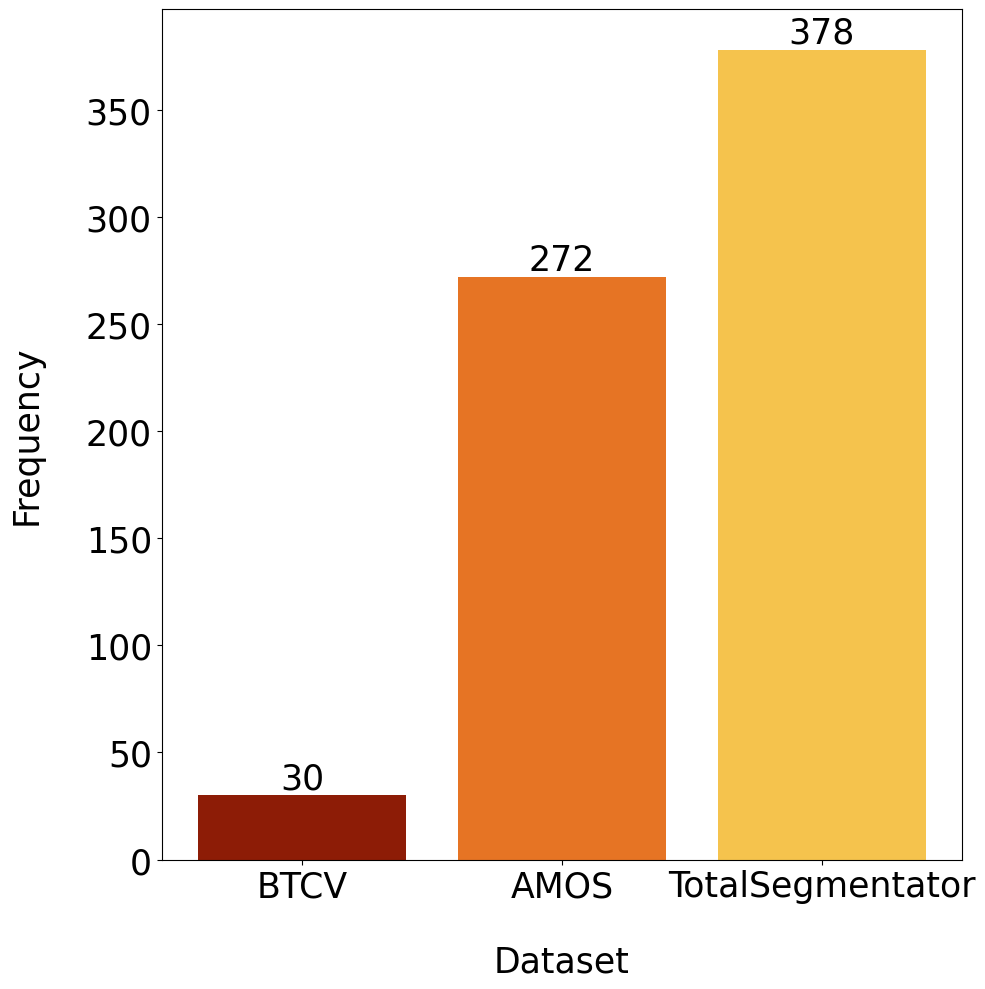

In [18]:
plt.figure(figsize=(10, 10))
fontsize = 25

colors = met_brew(name="Greek", n=3, brew_type="colorblind")

bars = plt.bar([0, 1, 2], [len(btcv), len(amos), len(totalseg)], color=colors)
plt.xlabel('Dataset', fontsize=fontsize, labelpad=30)
plt.ylabel('Frequency', fontsize=fontsize, labelpad=30)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.bar_label(bars, fontsize=fontsize)

plt.xticks([0, 1, 2], ['BTCV', 'AMOS', 'TotalSegmentator'])
plt.tight_layout()

plt.show()

## Image Size Variability

In [43]:
btcv_image_sizes = np.load('/data_analysis/three_datasets/data_saves/btcv_image_sizes.npy')
amos_image_sizes = np.load('/data_analysis/three_datasets/data_saves/amos_image_sizes.npy')
totalseg_image_sizes = np.load('/data_analysis/three_datasets/data_saves/totalseg_image_sizes.npy')

In [44]:
btcv_widths = [size[0] for size in btcv_image_sizes]
btcv_heights = [size[1] for size in btcv_image_sizes]
btcv_depths = [size[2] for size in btcv_image_sizes]

amos_widths = [size[0] for size in amos_image_sizes]
amos_heights = [size[1] for size in amos_image_sizes]
amos_depths = [size[2] for size in amos_image_sizes]

totalseg_widths = [size[0] for size in totalseg_image_sizes]
totalseg_heights = [size[1] for size in totalseg_image_sizes]
totalseg_depths = [size[2] for size in totalseg_image_sizes]

In [45]:
btcv_mean_width = np.mean(btcv_widths)
btcv_std_width = np.std(btcv_widths)
btcv_mean_height = np.mean(btcv_heights)
btcv_std_height = np.std(btcv_heights)
btcv_mean_depth = np.mean(btcv_depths)
btcv_std_depth = np.std(btcv_depths)

amos_mean_width = np.mean(amos_widths)
amos_std_width = np.std(amos_widths)
amos_mean_height = np.mean(amos_heights)
amos_std_height = np.std(amos_heights)
amos_mean_depth = np.mean(amos_depths)
amos_std_depth = np.std(amos_depths)

totalseg_mean_width = np.mean(totalseg_widths)
totalseg_std_width = np.std(totalseg_widths)
totalseg_mean_height = np.mean(totalseg_heights)
totalseg_std_height = np.std(totalseg_heights)
totalseg_mean_depth = np.mean(totalseg_depths)
totalseg_std_depth = np.std(totalseg_depths)

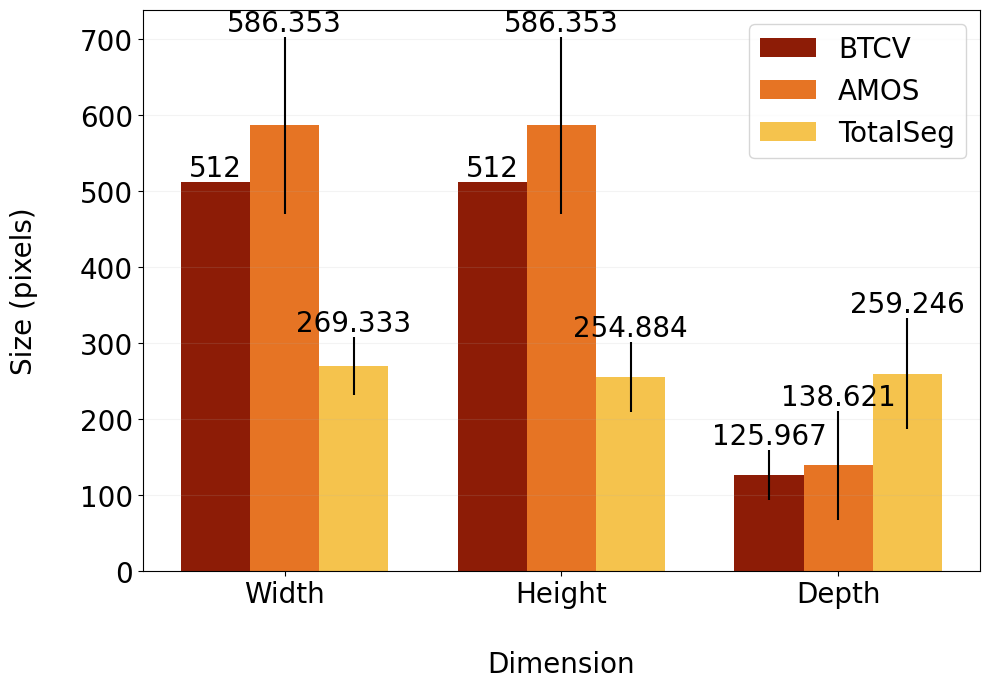

In [48]:
datasets = ['BTCV', 'AMOS', 'TotalSeg']
means = {
    'BTCV': [btcv_mean_width, btcv_mean_height, btcv_mean_depth],
    'AMOS': [amos_mean_width, amos_mean_height, amos_mean_depth],
    'TotalSeg': [totalseg_mean_width, totalseg_mean_height, totalseg_mean_depth]
}
stds = {
    'BTCV': [btcv_std_width, btcv_std_height, btcv_std_depth],
    'AMOS': [amos_std_width, amos_std_height, amos_std_depth],
    'TotalSeg': [totalseg_std_width, totalseg_std_height, totalseg_std_depth]
}

colors = met_brew(name="Greek", n=3, brew_type="colorblind")

fig, ax = plt.subplots(figsize=(10, 7))
fontsize = 20
width = 0.25 
ind = np.arange(3)

for i, dataset in enumerate(datasets):
    means_dataset = means[dataset]
    stds_dataset = stds[dataset]
    bars = ax.bar(ind + i*width, means_dataset, width, yerr=stds_dataset, label=dataset, color=colors[i])
    ax.bar_label(bars, fontsize=fontsize)

ax.set_xlabel('Dimension', fontsize=fontsize, labelpad=30)
ax.set_ylabel('Size (pixels)', fontsize=fontsize, labelpad=30)
ax.set_xticks(ind + width)
ax.set_xticklabels(['Width', 'Height', 'Depth'], fontsize=fontsize)
plt.yticks(fontsize=fontsize)
ax.legend(fontsize=fontsize)
plt.grid(True, axis='y', alpha=0.15)
plt.tight_layout()

plt.show()

## In-plane Resolution

In [49]:
btcv_image_dims = np.load('/data_analysis/three_datasets//data_saves/btcv_image_dims.npy')
amos_image_dims = np.load('/data_analysis/three_datasets//data_saves/amos_image_dims.npy')
totalseg_image_dims = np.load('/data_analysis/three_datasets//data_saves/totalseg_image_dims.npy')

In [50]:
btcv_widths = [size[0] for size in btcv_image_dims]
btcv_heights = [size[1] for size in btcv_image_dims]
btcv_depths = [size[2] for size in btcv_image_dims]

amos_widths = [size[0] for size in amos_image_dims]
amos_heights = [size[1] for size in amos_image_dims]
amos_depths = [size[2] for size in amos_image_dims]

totalseg_widths = [size[0] for size in totalseg_image_dims]
totalseg_heights = [size[1] for size in totalseg_image_dims]
totalseg_depths = [size[2] for size in totalseg_image_dims]

In [51]:
btcv_mean_width = np.mean(btcv_widths)
btcv_std_width = np.std(btcv_widths)
btcv_mean_height = np.mean(btcv_heights)
btcv_std_height = np.std(btcv_heights)
btcv_mean_depth = np.mean(btcv_depths)
btcv_std_depth = np.std(btcv_depths)

amos_mean_width = np.mean(amos_widths)
amos_std_width = np.std(amos_widths)
amos_mean_height = np.mean(amos_heights)
amos_std_height = np.std(amos_heights)
amos_mean_depth = np.mean(amos_depths)
amos_std_depth = np.std(amos_depths)

totalseg_mean_width = np.mean(totalseg_widths)
totalseg_std_width = np.std(totalseg_widths)
totalseg_mean_height = np.mean(totalseg_heights)
totalseg_std_height = np.std(totalseg_heights)
totalseg_mean_depth = np.mean(totalseg_depths)
totalseg_std_depth = np.std(totalseg_depths)

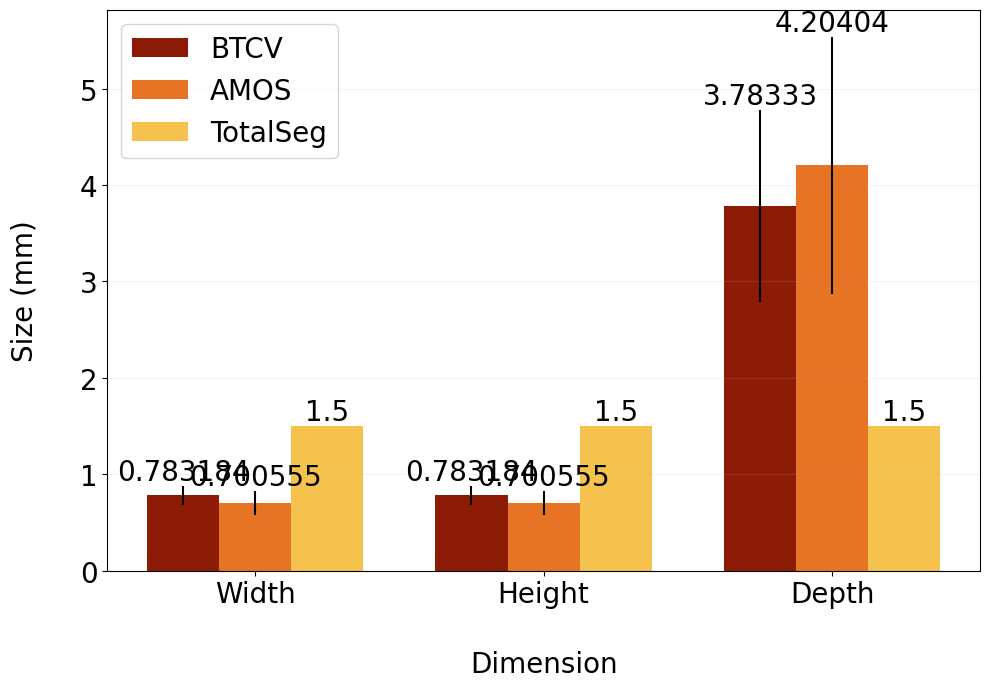

In [53]:
datasets = ['BTCV', 'AMOS', 'TotalSeg']
means = {
    'BTCV': [btcv_mean_width, btcv_mean_height, btcv_mean_depth],
    'AMOS': [amos_mean_width, amos_mean_height, amos_mean_depth],
    'TotalSeg': [totalseg_mean_width, totalseg_mean_height, totalseg_mean_depth]
}
stds = {
    'BTCV': [btcv_std_width, btcv_std_height, btcv_std_depth],
    'AMOS': [amos_std_width, amos_std_height, amos_std_depth],
    'TotalSeg': [totalseg_std_width, totalseg_std_height, totalseg_std_depth]
}

colors = met_brew(name="Greek", n=3, brew_type="colorblind")

fig, ax = plt.subplots(figsize=(10, 7))
fontsize = 20
width = 0.25 
ind = np.arange(3) 

for i, dataset in enumerate(datasets):
    means_dataset = means[dataset]
    stds_dataset = stds[dataset]
    bars = ax.bar(ind + i*width, means_dataset, width, yerr=stds_dataset, label=dataset, color=colors[i])
    ax.bar_label(bars, fontsize=fontsize)

ax.set_xlabel('Dimension', fontsize=fontsize, labelpad=30)
ax.set_ylabel('Size (mm)', fontsize=fontsize, labelpad=30)
ax.set_xticks(ind + width)
ax.set_xticklabels(['Width', 'Height', 'Depth'], fontsize=fontsize)
plt.yticks(fontsize=fontsize)
ax.legend(fontsize=fontsize, loc='upper left')
plt.grid(True, axis='y', alpha=0.15)
plt.tight_layout()

plt.show()

## Slice Count

In [59]:
btcv_slices = np.load('../btcv/image_num_slices.npy')
amos_slices = np.load('../amos/image_num_slices.npy')
totalseg_slices = np.load('../totalseg/image_num_slices.npy')

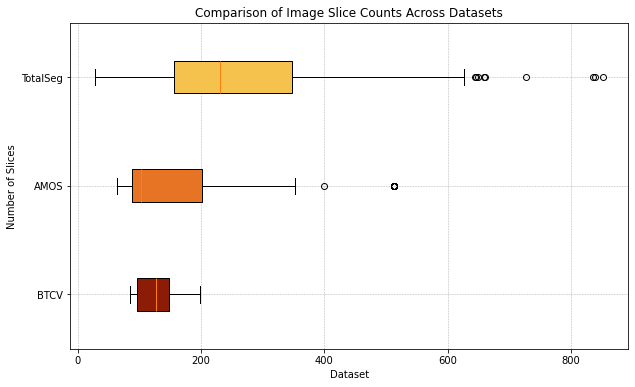

In [65]:
data = [btcv_slices, amos_slices, totalseg_slices]
labels = ['BTCV', 'AMOS', 'TotalSeg']

colors = met_brew(name="Greek", n=3, brew_type="colorblind")

plt.figure(figsize=(10, 6))
bplot = plt.boxplot(data, labels=labels, showfliers=True, vert=False, patch_artist=True)
plt.title('Comparison of Image Slice Counts Across Datasets')
plt.ylabel('Number of Slices')
plt.xlabel('Dataset')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

for c, patch in enumerate(bplot['boxes']):
    patch.set_facecolor(colors[c])

plt.show()